## 1. Importing the data from kaggle

In [201]:
# from google.colab import userdata
# import os

# # Store your credentials in Colab Secrets first (see below)
# os.environ['KAGGLE_USERNAME'] = userdata.get('KAGGLE_USERNAME')
# os.environ['KAGGLE_KEY'] = userdata.get('KAGGLE_KEY')

# !kaggle datasets download -d marcodena/mobile-phone-activity #marcodena/mobile-phone-activity
# !unzip mobile-phone-activity.zip


## 2. Import important libraries


In [202]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

## 3. Get the files required and merge into one dataframe


In [203]:
files = [f for f in os.listdir() if f.endswith('.csv') or f.endswith('.geojson')]
print('*'*70)
print(f"What does this folder contain: Found {len(files)} data files:")
print('*'*70)
for i, f in enumerate(sorted(files), 1):
    size = os.path.getsize(f) / 1024**2  # Size in MB
    print(f"  {i:2d}. {f:50s} ({size:6.2f} MB)")

**********************************************************************
What does this folder contain: Found 17 data files:
**********************************************************************
   1. ISTAT_census_variables_2011.csv                    (  0.08 MB)
   2. Italian_provinces.geojson                          (  7.66 MB)
   3. mi-to-provinces-2013-11-01.csv                     ( 94.09 MB)
   4. mi-to-provinces-2013-11-02.csv                     ( 93.68 MB)
   5. mi-to-provinces-2013-11-03.csv                     ( 86.78 MB)
   6. mi-to-provinces-2013-11-04.csv                     (133.25 MB)
   7. mi-to-provinces-2013-11-05.csv                     (137.29 MB)
   8. mi-to-provinces-2013-11-06.csv                     (137.76 MB)
   9. mi-to-provinces-2013-11-07.csv                     (136.75 MB)
  10. milano-grid.geojson                                (  3.02 MB)
  11. sms-call-internet-mi-2013-11-01.csv                ( 79.40 MB)
  12. sms-call-internet-mi-2013-11-02.csv      

In [170]:
data_2 = pd.read_csv("sms-call-internet-mi-2013-11-02.csv")
data_4 = pd.read_csv("sms-call-internet-mi-2013-11-04.csv")
data_6 = pd.read_csv("sms-call-internet-mi-2013-11-06.csv")

In [171]:
data_2.head()

,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet
0,2013-11-02 00:00:00,1,0,0.2445,NaN,NaN,NaN,NaN
1,2013-11-02 00:00:00,1,39,1.4952,1.1213,0.2708,0.3004,46.5094
2,2013-11-02 00:00:00,1,53,0.0018,0.0036,NaN,NaN,NaN
3,2013-11-02 00:00:00,2,0,0.2458,NaN,NaN,NaN,NaN
4,2013-11-02 00:00:00,2,39,1.5028,1.1243,0.2751,0.3023,46.6933


In [172]:
data_4.head()

,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet
0,2013-11-04 00:00:00,1,0,0.1080,NaN,NaN,NaN,NaN
1,2013-11-04 00:00:00,1,39,1.0266,0.8069,0.0552,0.2155,50.342
2,2013-11-04 00:00:00,2,0,0.1093,NaN,NaN,NaN,NaN
3,2013-11-04 00:00:00,2,39,1.0430,0.8226,0.0556,0.2195,50.432
4,2013-11-04 00:00:00,3,0,0.1106,NaN,NaN,NaN,NaN


In [173]:
data_6.head()

,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet
0,2013-11-06 00:00:00,1,0,0.0814,NaN,NaN,NaN,NaN
1,2013-11-06 00:00:00,1,39,0.7458,0.7204,0.1626,0.1057,52.3219
2,2013-11-06 00:00:00,2,0,0.0829,NaN,NaN,NaN,NaN
3,2013-11-06 00:00:00,2,39,0.7653,0.7409,0.1639,0.1094,52.4064
4,2013-11-06 00:00:00,3,0,0.0846,NaN,NaN,NaN,NaN


#### Merge the 3 datasets

In [174]:
# merge takes 2 datasets at a time
data_1 = pd.merge(data_2, data_4, how='outer')

In [175]:
data_1.head()

,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet
0,2013-11-02 00:00:00,1,0,0.2445,NaN,NaN,NaN,NaN
1,2013-11-02 00:00:00,1,39,1.4952,1.1213,0.2708,0.3004,46.5094
2,2013-11-02 00:00:00,1,53,0.0018,0.0036,NaN,NaN,NaN
3,2013-11-02 00:00:00,2,0,0.2458,NaN,NaN,NaN,NaN
4,2013-11-02 00:00:00,2,39,1.5028,1.1243,0.2751,0.3023,46.6933


In [176]:
data = pd.merge(data_1, data_6, how='outer')

In [ ]:
data.head()

,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet
0,2013-11-02 00:00:00,1,0,0.2445,NaN,NaN,NaN,NaN
1,2013-11-02 00:00:00,1,39,1.4952,1.1213,0.2708,0.3004,46.5094
2,2013-11-02 00:00:00,1,53,0.0018,0.0036,NaN,NaN,NaN
3,2013-11-02 00:00:00,2,0,0.2458,NaN,NaN,NaN,NaN
4,2013-11-02 00:00:00,2,39,1.5028,1.1243,0.2751,0.3023,46.6933


In [ ]:
# check the data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6564031 entries, 0 to 6564030
Data columns (total 8 columns):
 #   Column       Dtype  
---  ------       -----  
 0   datetime     object 
 1   CellID       int64  
 2   countrycode  int64  
 3   smsin        float64
 4   smsout       float64
 5   callin       float64
 6   callout      float64
 7   internet     float64
dtypes: float64(5), int64(2), object(1)
memory usage: 400.6+ MB


In [177]:
# get the statistical view of the data
data.describe()

,CellID,countrycode,smsin,smsout,callin,callout,internet
count,6.564031e+06,6.564031e+06,2.599860e+06,1.538293e+06,1.802346e+06,2.799547e+06,2.942914e+06
mean,5.311925e+03,3.631952e+02,7.861976e+00,7.440751e+00,7.738604e+00,5.686694e+00,1.019762e+02
std,2.719989e+03,4.373302e+03,2.741969e+01,2.525568e+01,2.976025e+01,2.650483e+01,4.259616e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.174000e+03,3.300000e+01,1.012000e-01,9.250000e-02,5.790000e-02,5.590000e-02,5.790000e-02
50%,5.448000e+03,4.300000e+01,6.114000e-01,5.577000e-01,2.463000e-01,2.094000e-01,2.050000e-01
75%,7.545000e+03,8.600000e+01,4.761925e+00,4.453000e+00,2.349400e+00,1.044500e+00,6.118175e+00
max,1.000000e+04,9.725900e+04,2.232878e+03,2.270682e+03,1.283078e+03,1.502868e+03,3.174863e+04


In [178]:
# check the percentage of missing values for every entry

total_null = data.isna().sum()
print(total_null)

datetime             0
CellID               0
countrycode          0
smsin          3964171
smsout         5025738
callin         4761685
callout        3764484
internet       3621117
dtype: int64


In [179]:
from pandas.core.dtypes import missing
# sum the total missing entries
missing_cols = ['smsin', 'smsout','callin', 'callout', 'internet']
print(data[missing_cols].isna().sum().sum())

21137195


In [180]:
data.shape

(6564031, 8)

In [181]:
null_elem = (total_null/ len(data))*100  # max also includes the number of null rows, But .count() excludes these rows
print(null_elem.round(2))

datetime        0.00
CellID          0.00
countrycode     0.00
smsin          60.39
smsout         76.56
callin         72.54
callout        57.35
internet       55.17
dtype: float64


As we can see from the above, smsin, smsout,callin,callout,internet hace a high percentage of missing values. So dropping these will highly affect our dataset. So, I'll be filling in the missing values with the mean of their columns


In [182]:
columns_to_fill = ['smsin', 'smsout', 'callin', 'callout', 'internet']

data.fillna(data[columns_to_fill].mean(), inplace = True)



In [183]:
#now lets check if the operation worked
print(data.isna().sum())


datetime       0
CellID         0
countrycode    0
smsin          0
smsout         0
callin         0
callout        0
internet       0
dtype: int64


We can see that we now have no missing values

### Now we check for outliers

In [184]:
# import math


# #Plot the boxplots
# #Plot the skewness by using a histogram

# num_cols = data.select_dtypes('number').drop(['CellID','countrycode'], axis = 1)

# columns = num_cols.columns
# n_cols = 3  # number of plots per row
# n_rows = math.ceil(len(columns)/n_cols)

# fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
# axes = axes.flatten()

# for ax, col in zip(axes, columns):
#     sns.boxplot(y=num_cols[col], ax=ax, color='red')
#     ax.set_title(f'Boxplot for {col}')
#     ax.set_ylabel(col)  # shows the scale per column

# # hide any unused axes
# for ax in axes[len(columns):]:
#     ax.set_visible(False)

# plt.tight_layout()
# plt.show()

In [185]:
# have seperate columns for date and time

#first convert the column to date time
data['datetime'] = pd.to_datetime(data['datetime'])
data['date'] = data['datetime'].dt.date
data['time'] = data['datetime'].dt.time
data['hour'] = data['datetime'].dt.hour


In [186]:
data.head(1)

,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet,date,time,hour
0,2013-11-02,1,0,0.2445,7.440751,7.738604,5.686694,101.976153,2013-11-02,00:00:00,0


Feature engineering

In [187]:
# creating new columns: total sms, total calls, total internet
data['totalsms'] = data['smsin'] + data['smsout']
data['totalcalls'] = data['callin'] + data['callout']



In [188]:
data.head(1)

,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet,date,time,hour,totalsms,totalcalls
0,2013-11-02,1,0,0.2445,7.440751,7.738604,5.686694,101.976153,2013-11-02,00:00:00,0,7.685251,13.425298


Further dive

In [189]:
print("\n" + "="*70)
print("UNDERSTANDING THE DATA STRUCTURE")
print("="*70)

# How many unique grid squares?
print(f"\nAll non-unique grid squares (CID): {len(data['CellID'])}")

print(f"All Unique grid squares (CID): {data['CellID'].nunique()}")
'''Could still have this with this
print(f"How many different CID are there:{len(data['CellID'].value_counts())}")'''

# Let's look at one grid square
sample_cid = data['CellID'].iloc[13]
print(f"\nSample grid square: {sample_cid}\n")

#we look only at a unique grip square (CID=1)
print(f"\nSample grid square for CID= 5 only")
single_cid_5=data[data['CellID'] == sample_cid]
single_cid_5


UNDERSTANDING THE DATA STRUCTURE

All non-unique grid squares (CID): 6564031
All Unique grid squares (CID): 10000

Sample grid square: 5


Sample grid square for CID= 5 only


,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet,date,time,hour,totalsms,totalcalls
11,2013-11-02 00:00:00,5,0,0.211000,7.440751,7.738604,5.686694,101.976153,2013-11-02,00:00:00,0,7.651751,13.425298
12,2013-11-02 00:00:00,5,39,1.298400,0.991900,0.236800,0.267300,41.665500,2013-11-02,00:00:00,0,2.290300,0.504100
13,2013-11-02 00:00:00,5,53,0.004900,0.009800,7.738604,5.686694,101.976153,2013-11-02,00:00:00,0,0.014700,13.425298
49611,2013-11-02 01:00:00,5,0,0.074000,7.440751,7.738604,0.023700,101.976153,2013-11-02,01:00:00,1,7.514751,7.762304
49612,2013-11-02 01:00:00,5,39,1.137100,0.611500,0.154000,0.088800,39.042700,2013-11-02,01:00:00,1,1.748600,0.242800
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6411519,2013-11-06 22:00:00,5,48,0.021700,7.440751,7.738604,5.686694,101.976153,2013-11-06,22:00:00,22,7.462451,13.425298
6411520,2013-11-06 22:00:00,5,53,7.861976,0.004900,7.738604,5.686694,101.976153,2013-11-06,22:00:00,22,7.866876,13.425298
6496225,2013-11-06 23:00:00,5,0,0.213100,7.440751,7.738604,5.686694,101.976153,2013-11-06,23:00:00,23,7.653851,13.425298
6496226,2013-11-06 23:00:00,5,39,1.880800,1.380600,0.408300,0.450700,58.915500,2013-11-06,23:00:00,23,3.261400,0.859000


In [190]:
#double checking that we are dealing with only one CID
data[data['CellID'] == sample_cid].CellID.value_counts()

,count
CellID,
5,375


In [191]:
single_cid_5

,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet,date,time,hour,totalsms,totalcalls
11,2013-11-02 00:00:00,5,0,0.211000,7.440751,7.738604,5.686694,101.976153,2013-11-02,00:00:00,0,7.651751,13.425298
12,2013-11-02 00:00:00,5,39,1.298400,0.991900,0.236800,0.267300,41.665500,2013-11-02,00:00:00,0,2.290300,0.504100
13,2013-11-02 00:00:00,5,53,0.004900,0.009800,7.738604,5.686694,101.976153,2013-11-02,00:00:00,0,0.014700,13.425298
49611,2013-11-02 01:00:00,5,0,0.074000,7.440751,7.738604,0.023700,101.976153,2013-11-02,01:00:00,1,7.514751,7.762304
49612,2013-11-02 01:00:00,5,39,1.137100,0.611500,0.154000,0.088800,39.042700,2013-11-02,01:00:00,1,1.748600,0.242800
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6411519,2013-11-06 22:00:00,5,48,0.021700,7.440751,7.738604,5.686694,101.976153,2013-11-06,22:00:00,22,7.462451,13.425298
6411520,2013-11-06 22:00:00,5,53,7.861976,0.004900,7.738604,5.686694,101.976153,2013-11-06,22:00:00,22,7.866876,13.425298
6496225,2013-11-06 23:00:00,5,0,0.213100,7.440751,7.738604,5.686694,101.976153,2013-11-06,23:00:00,23,7.653851,13.425298
6496226,2013-11-06 23:00:00,5,39,1.880800,1.380600,0.408300,0.450700,58.915500,2013-11-06,23:00:00,23,3.261400,0.859000


Now we visualise

In [192]:
# focus on sms outgoing
sms_out =  single_cid_5['smsout'].notna()
sms_outgoing = single_cid_5[sms_out]
print(f"   The Shape of the datasets with non Nan Outgoing call only: {sms_outgoing.shape}")
sms_outgoing

   The Shape of the datasets with non Nan Outgoing call only: (375, 13)


,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet,date,time,hour,totalsms,totalcalls
11,2013-11-02 00:00:00,5,0,0.211000,7.440751,7.738604,5.686694,101.976153,2013-11-02,00:00:00,0,7.651751,13.425298
12,2013-11-02 00:00:00,5,39,1.298400,0.991900,0.236800,0.267300,41.665500,2013-11-02,00:00:00,0,2.290300,0.504100
13,2013-11-02 00:00:00,5,53,0.004900,0.009800,7.738604,5.686694,101.976153,2013-11-02,00:00:00,0,0.014700,13.425298
49611,2013-11-02 01:00:00,5,0,0.074000,7.440751,7.738604,0.023700,101.976153,2013-11-02,01:00:00,1,7.514751,7.762304
49612,2013-11-02 01:00:00,5,39,1.137100,0.611500,0.154000,0.088800,39.042700,2013-11-02,01:00:00,1,1.748600,0.242800
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6411519,2013-11-06 22:00:00,5,48,0.021700,7.440751,7.738604,5.686694,101.976153,2013-11-06,22:00:00,22,7.462451,13.425298
6411520,2013-11-06 22:00:00,5,53,7.861976,0.004900,7.738604,5.686694,101.976153,2013-11-06,22:00:00,22,7.866876,13.425298
6496225,2013-11-06 23:00:00,5,0,0.213100,7.440751,7.738604,5.686694,101.976153,2013-11-06,23:00:00,23,7.653851,13.425298
6496226,2013-11-06 23:00:00,5,39,1.880800,1.380600,0.408300,0.450700,58.915500,2013-11-06,23:00:00,23,3.261400,0.859000


In [193]:
sms_outgoing['hour'] = sms_outgoing['datetime'].dt.hour

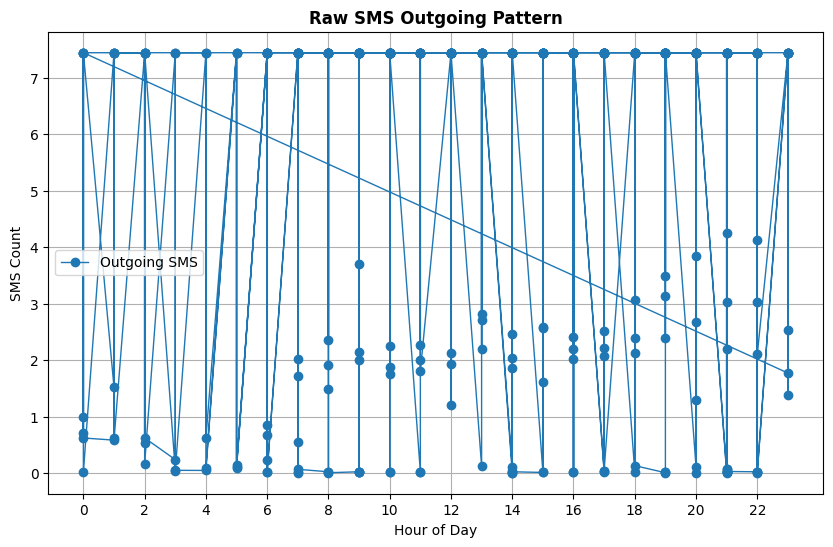

In [194]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 6))


# Plot 1: Raw data
plt.plot(sms_outgoing['hour'],sms_outgoing['smsout'], marker='o', linewidth=1, markersize=6, label='Outgoing SMS')
plt.title('Raw SMS Outgoing Pattern', fontweight='bold', fontsize=12)
plt.xlabel('Hour of Day')
plt.ylabel('SMS Count')
plt.xticks(range(0, 24, 2))
plt.grid(True)
plt.legend();


# QUESTIONS (50)

1. How many total records across all 3 datasets? (10)

In [ ]:
data.shape

(6564031, 13)

Answer: We have 6564031 records

2. How many unique grid squares (CellID) are there? (5)

In [195]:
data['CellID'].nunique()

10000

In [196]:
print(data['CellID'].unique())

[    1     2     3 ...  9998  9999 10000]


Answer: We have 10000 uniques grid squares

3. How many unique country codes appear in the data? (5)

In [197]:
data['countrycode'].nunique()

302

In [198]:
print(data['countrycode'].unique())

[    0    39    53    33    46     1    55     7    34    31    32   244
    43    52   593    20    40    44   355    41   591    49    86    63
  1514    56   880    94   353   221    90    48   421    62    51    30
   351   233    47   258    91    81 88239   503   420  1613    84   212
   385   216 18099   381 18096    58   508  1829    57   380    36 18092
 18686   358    82   886    65    61   359   371   852   356   966    45
   372   974   357   375    98    93   971   354    60  1579    54   213
   961   389  1403   370 18098   352  1647  1787    92  1416  1849   506
   218   963   224 18763   220   242 18097   238   386   972   265  1778
   387   965   226   382  7701   995   687    66  1519   261   230 88235
   681   234  1438   507   225   504   977   505   373   248  1808    27
   968   255   249   254   229   998   996   256  1604   291   994   374
  7705   243 12687   962   960   228   237  1204   250  1306  1250   350
  7702  7777  8817    64   263  7713  1214  1809   

4. What is the most common peak hour across all grids? (5)

In [199]:
# Find peak hour (hour with most total activity across all grids)
peak_hour = data['hour'].value_counts().idxmax()
print(f"Peak hour: {peak_hour}")

Peak hour: 12


5. What hour has the lowest activity? (5)

In [200]:
min_hour = data['hour'].value_counts().idxmin()
print(f"Lowest activity: {min_hour}")

Lowest activity: 3


6. Calculate and report: mean, median, std, min, max for total calls by hour (15)

In [204]:
(data.groupby('hour')['totalcalls'].describe())

,count,mean,std,min,25%,50%,75%,max
hour,,,,,,,,
0,150207.0,10.280157,5.279040,0.0002,7.764204,13.425298,13.425298,223.4941
1,119415.0,9.928661,5.129893,0.0000,7.742704,13.425298,13.425298,141.9847
2,103908.0,9.894713,5.329786,0.0000,7.295974,13.425298,13.425298,210.9691
3,97566.0,9.953373,5.649571,0.0000,6.710124,13.425298,13.425298,298.3541
4,107494.0,10.235666,5.294288,0.0000,7.758104,13.425298,13.425298,255.0555
5,124507.0,10.029019,5.395003,0.0000,7.753104,13.425298,13.425298,177.1690
6,173260.0,10.339697,4.969421,0.0002,7.770704,13.425298,13.425298,201.3488
7,240986.0,11.464472,8.435423,0.0000,7.810304,13.425298,13.425298,412.7314
8,318128.0,13.272816,22.237365,0.0000,7.789404,13.425298,13.425298,1122.7091


7. What percentage of total activity happens during daytime (6am-8pm) vs nighttime(8 pm -6 am)? (5)

In [205]:
data['totalactivity'] = data['totalsms'] + data['totalcalls']
data.head(2)

,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet,date,time,hour,totalsms,totalcalls,totalactivity
0,2013-11-02,1,0,0.2445,7.440751,7.738604,5.686694,101.976153,2013-11-02,00:00:00,0,7.685251,13.425298,21.110549
1,2013-11-02,1,39,1.4952,1.121300,0.270800,0.300400,46.509400,2013-11-02,00:00:00,0,2.616500,0.571200,3.187700


In [206]:
# Hours between 6 and 20 (6 AM to 8 PM)
daytime_activity = data[(data['hour'] >= 6) & (data['hour'] < 20)]['totalactivity'].sum()


In [207]:
nighttime_activity = data[(data['hour'] >= 20) | (data['hour'] < 6)]['totalactivity'].sum()

In [208]:
total_activity = data['totalactivity'].sum()
# daytime_activity = data[data['hour'].isin(daytime.dropna())]['totalactivity'].sum()
# nighttime_activity = data[data['hour'].isin(nighttime.dropna())]['totalactivity'].sum()

In [ ]:
#get the percentages
day_per = (daytime_activity / total_activity) * 100
print(f"Daytime activity: {day_per.round(2)}%")
night_per = (nighttime_activity / total_activity) * 100
print(f"Nighttime activity: {night_per.round(2)}%")


Daytime activity: 77.72%
Nighttime activity: 22.28%


8. Do international calls happen at different times than domestic? (compare hourly patterns) (5)


In [209]:
domestic_calls = data[data['countrycode']== 39]
international_calls = data[data['countrycode'] != 39]

# how many domestic calls do we get per hour
domestic_hourly = domestic_calls.groupby('hour')['totalcalls'].sum()
international_hourly = international_calls.groupby('hour')['totalcalls'].sum()

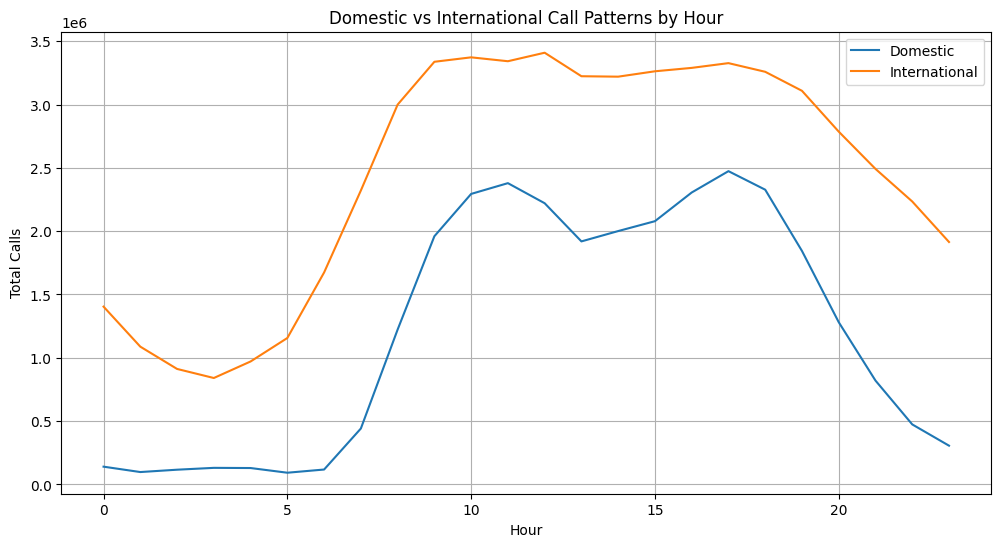

In [210]:
comparison = pd.DataFrame({
    'domestic': domestic_hourly,
    'international': international_hourly
})

comparison.plot(kind='line', figsize=(12, 6))
plt.xlabel('Hour')
plt.ylabel('Total Calls')
plt.title('Domestic vs International Call Patterns by Hour')
plt.legend(['Domestic', 'International'])
plt.grid(True)
plt.show()

9. Use numpy to perform statistical comparisons between different conditions. (5)


9.1 Domestic (Italy) vs International calls.

In [211]:
len(domestic_calls)

719995

In [212]:
len(international_calls)

5844036

In [213]:
domestic_calls = data[data['countrycode']== 39]
international_calls = data[data['countrycode'] != 39]

# how many smses we get
domestic_sms = domestic_calls['totalsms'].sum()

international_sms = international_calls['totalsms'].sum()


In [ ]:
domestic_percentage = (len(domestic_calls)/ len(data))*100
international_percentage = (len(international_calls) / len(data))*100

print(f"Domestic Calls: {domestic_percentage:.2f}%")
print(f"International Calls: {international_percentage:.2f}%")

Domestic Calls: 10.97%
International Calls: 89.03%


9.2 What percentage of SMS are international vs domestic? (5)


In [214]:
# Get total SMS for domestic and international
domestic_sms = data[data['countrycode'] == 39]['totalsms'].sum()
international_sms = data[data['countrycode'] != 39]['totalsms'].sum()
total_sms = data['totalsms'].sum()

# Calculate percentages
domestic_sms_percentage = (domestic_sms / total_sms) * 100
international_sms_percentage = (international_sms / total_sms) * 100

print(f"Domestic SMS: {domestic_sms_percentage:.2f}%")
print(f"International SMS: {international_sms_percentage:.2f}%")

Domestic SMS: 24.98%
International SMS: 75.02%


9.3 Are international calls more incoming or outgoing (calculate the ratio) (5)


In [ ]:
international_calls = data[data['countrycode'] != 39]

int_incoming_total = international_calls['callin'].sum()
int_outgoing_total = international_calls['callout'].sum()

In [215]:
ratio = int_incoming_total / int_outgoing_total
print(f"International incoming/outgoing ratio: {ratio:.2f}: 1")

International incoming/outgoing ratio: 1.67: 1


10. Is there a correlation between SMS volume and Call volume at the grid level? (5)

In [216]:
#What's our grid level again?
print(sample_cid)

5


In [217]:
# now we find volume for sms and calls in this grid

grid_summary = data.groupby('CellID').agg({
    'totalsms': 'sum',
    'totalcalls': 'sum'
}).reset_index()

# Now calculate correlation
correlation = np.corrcoef(grid_summary['totalsms'], grid_summary['totalcalls'])[0, 1]
print(f"Correlation between SMS and Call volume at grid level: {correlation:.4f}")



Correlation between SMS and Call volume at grid level: 0.9862
